<div style="background-color : white; border-radius: 15px; width: 93%; padding: 2em; color: black; font-family: Gill Sans, sans-serif;">
    <h1 style ="text-align: center; color: black; font-family: Gill Sans, sans-serif;font-weight: 700;"> Implementazione di un classificatore con Logistic Regression </h1>
    <h2>Indice</h2>
    <ol type="1">
        <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Basi per la logistic regression</b>
            <ul>
                <li style="padding-top: 0.3em; padding-bottom: 0.3em;">1.1 Pacchetti necessari</li>
                <li style="padding-bottom: 0.3em;">1.2 Funzione logistica o sigmoide</li>
                <li style="padding-bottom: 0.3em;">1.3 Funzione d'ipotesi</li>
                <li style="padding-bottom: 0.3em;">1.4 Gradient ascent</li>
                <li>1.5 Funzione di predizione</li>
            </ul>
        </li>
        <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Preparazione dataset</b>
            <ul>
                <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.1 Caricamento del dataset</li>
                <li style="padding-bottom: 0.3em;">2.2 Divisione del dataset in train e test set</li>
                <li style="padding-bottom: 0.3em;">2.3 Manipolazione dei dati</li>
                <li>2.4 Normalizzazione dei dati</li>
            </ul>
        </li>
        <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><b>Applicazione del modello</b>
            <ul>
                <li style="padding-top: 0.3em; padding-bottom: 0.3em;">3.1 Allenamento del modello</li>
                <li>3.2 Risultati del modello allenato</li>
            </ul>
        </li>
        <li style="padding-top: 0.3em"><b>Valutazione del modello</b>
            <ul>
                <li style="padding-top: 0.3em; padding-bottom: 0.3em;">4.1 Metrica d'errore</li>
                <li style="padding-bottom: 0.3em;">4.2 Confusion Matrix</li>
                <li style="padding-bottom: 0.3em;">4.3 Curva precision e recall</li>
                <li>4.4 Curva ROC e AUC</li>
            </ul>
        </li>
    </ol>
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 1. Basi per la logistic regression </h3></a>
    <h4 style="color:black"> 1.1 Pacchetti necessari </h4>
</div>

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.2 Funzione logistica o sigmoide </h4>
    <p style="color: black;">Funzione matematica che produce una curva avente un andamento ad "S". È una funzione reale limitata tra 0 e 1, definita per tutti i valori reali. È differenziabile, ha una derivata non negativa in ogni punto ed un punto di flesso in (0;0.5)</p>
    <span style="display:flex; flex-direction:row; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/Logistic-curve.png">
        <img src="./notebook_pic/Logistic-formula.jpg">
    </span>
</div>

In [35]:
def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.3 Funzione d'ipotesi </h4>
    <p style="color: black;">La funzione di costo della logistic regression sarà basta sulla funzione sigmoide. Infatti, per effettuare la classificazione, serve una funzione con codominio [0,1]: la predizione si baserà sulla probabilità della stima di appartenere ad una delle due classi.</p>
    <p style="color: black;">Teoricamente le features potrebbero variare tra -ꝏ e ꝏ. Usando la funzione sigmoide: valori molto positivi non divergeranno verso l'infinito, bensì si attesteranno verso 1;  valori molto negativi non divergeranno verso l'infinito negativo, bensì si attesteranno verso 0.</p>
    <span style="display:flex; flex-direction:row; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/hyp.jpg">
    </span>
</div>

In [36]:
def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.4 Funzione di costo </h4>
    <p style="color: black;">La distribuzione di probabilità di un classificatore binario è rappresentata da una distribuzione di Bernoulli. In particolare, date le features (<b>x</b>) ed i pesi (<b>θ</b>), siamo interessati alla probabilità che l'output (Y) appartenga ad una delle due classi (0 o 1).</p>
    <span style="display:flex; flex-direction:row; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/bern1.jpg">
        <img src="./notebook_pic/bern2.jpg">
    </span>
    <span style="display:flex; flex-direction:row; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/bern3.jpg">
    </span>
    <p style="color: black;">Considerando tutte le features e ipotizzando che siano indipendenti e identicamente distribuite otteniamo la funzione di likelihood e successivamente la funzione di costo logaritmica</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/bern4.jpg">
        <img src="./notebook_pic/bern5.jpg">
        <img src="./notebook_pic/bern6.jpg">
    </span>
</div>

In [37]:
def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.5 Gradient ascent </h4>
    <p style="color: black;">Per come si è impostata la distribuzione, i pesi dovranno essere tali da massimizzare la funzione di costo. Infatti quando la y assume un valore, la funzione d'ipotesi dell'altro caso viene annullata. Quindi per riconoscere effettivamente un vero caso y, la funzione d'ipotesi deve aver il valore più grande possibile.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/cost1.jpg">
        <img src="./notebook_pic/cost2.jpg">
    </span>
    <p style="color: black;">Per raggiungere la massimizzazione dei pesi si utilizza un algoritmo gradient ascent. Data la curva della funzione di costo, si parte da un valore di <b>θ</b> e si calcola il valore di J(<b>θ</b>). In base alla derivata di J(<b>θ</b>) ci sposta lungo la curva di un fattore <i>α</i> e si ripete l'operazione fino alla convergenza, quindi finchè lo spostamento tra due valori di J(<b>θ</b>) è minimo.</p>
    <center><p style="color: black; font-size: 2em; padding-top: 2%;"><b>Esempio di gradient ascent su una parabola</b></p></center>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/grad_asc1.jpg">
    </span>
    <p style="color: black;">Per il ragionamento suddetto, i pesi <b>θ</b> vengono aggiornati in base alla seguente formula.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/grad_asc2.jpg">
    </span>
    <p style="color: black;">Il procedimento può essere visto in forma algoritmica.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/grad_asc3.jpg">
    </span>
</div>

In [38]:
def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    print(W)
    return iter  

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 1.6 Funzione di predizione </h4>
    <p style="color: black;">Una volta allenato il modello, calcolando la funzione d'ipotesi con le features interessate e i pesi aggiornati si ottiene una stima di probabilità sulla classe relativa alle features proposte. Se quest'ultima supera una certa soglia, la classe sarà la 1, altrimenti la 0.</p>
    <p style="color: black;">L'accurancy del modello viene ottenuta facendo la media del numero di volte in cui la predizione è stata corretta</p>
</div>

In [39]:
def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    Y_hat = h > 0.5
    accuracy = 1.0/m * np.sum(Y.T == Y_hat)
    return accuracy, Y_hat, h

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 2. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 2.1 Caricamento del dataset </h4>
</div>

In [40]:
# Carico il dataset
path = '../color_extr/data.csv'
data = pd.read_csv(path, usecols = [i for i in range(5)])

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.2 Divisione del dataset in train e test set </h4>
</div>

In [41]:
# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[['presenza_foglie','assenza_foglie','presenza_bachi_sfondo','assenza_bachi_sfondo']], data[['classificazione']], test_size=0.23)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3 Manipolazione dei dati </h4>
    <ul style="color: black;">
        <li>Tutti i set sono convertiti in array numpy</li>
        <li>Alle features viene aggiunto il bias della funzione d'ipotesi (θ<sub>0</sub>)</li>
        <li>Viene inizializzato il vettore dei pesi</li>
    </ul>
</div>

In [42]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.4 Normalizzazione dei dati </h4>
</div>

In [43]:
# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 3. Applicazione del modello </h3></a>
    <h4 style="color:black"> 3.1 Allenamento del modello</h4>
    <p style="color:black"> Cerco il punto di massimo della funzione di costo per trovare i pesi ottimi.</p>
    <p style="color:black"> Iperparametri (alpha e condizione di stop) scelti in base al metodo Hand Tuning: iperparametri selzionati in base alle prove sul modello finchè non si raggiungono delle performance soddisfacenti</p>
</div>

In [44]:
gradient_ascent(X_train,W,Y_train,0.04,0.001)

inf
0.014149768584932332
0.013607437879283202
0.013086842159378054
0.012587590678518223
0.012109216280628998
0.011651188506011545
0.011212925883224978
0.010793807266988531
0.010393182135906232
0.01001037980984143
0.009644717584580298
0.009295507811192816
0.008962063969835232
0.008643705803455859
0.008339763586952986
0.008049581612721957
0.007772520975248165
0.0075079617362231454
0.007255304548442254
0.007013971812025399
0.006783408430928783
0.006563082231591688
0.006352484099309441
0.006151127881719731
0.005958550102838522
0.0057743095254843
0.005597986594764182
0.005429182790595621
0.005267519913009389
0.005112639320227097
0.004964201136192614
0.004821883441348485
0.004685381457943727
0.0045544067389990395
0.00442868636821403
0.0043079621765381715
0.004191989979798194
0.004080538840676662
0.003973390357405127
0.003870337980783012
0.00377118636049506
0.0036757507212074603
0.0035838562684978315
0.003495337624361383
0.0034100382917729988
0.0033278101475897603
0.0032485129629339915
0.0031

116

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Risultati del modello allenato </h4>
</div>

In [45]:
train_accurancy, train_predictions, train_prob_predictions = prediction(W,X_train,Y_train)
test_accurancy, test_predictions, test_prob_predictions = prediction(W,X_test,Y_test)

print("### MyLog:\n\tAccuracy of training: "+str(train_accurancy)+"\n\tAccuracy of test: "+str(test_accurancy))
print("### MyLog:\n\tError rate of training: "+str(1 - train_accurancy)+"\n\tError rate of test: "+str(1 - test_accurancy))

### MyLog:
	Accuracy of training: 0.9682692307692308
	Accuracy of test: 0.9614147909967845
### MyLog:
	Error rate of training: 0.03173076923076923
	Error rate of test: 0.03858520900321549


<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 4. Valutazione del modello </h3></a>
    <h4 style="color:black"> 4.1 Metrica d'errore</h4>
    <p style="color:black">Per definire basso o alto l'error rate, è necessaria una metrica. Possiamo definirla considerando l'errore che farebbe un classificatore che predice sempre solo una delle due classi. In base a questo valore si valuta l'errore del classificatore implementato</p>
</div>

In [46]:
# metric_error = #valori classe 0 / #valori classi
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

print("Error rate di un classificatore che predice solo 0: ", metric_error)
print("Accuracy di un classificatore che predice solo 0: ", metric_accurancy)

Error rate di un classificatore che predice solo 0:  0.44041450777202074
Accuracy di un classificatore che predice solo 0:  0.5595854922279793


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif; color:black;">
    <h4 style="color: black;"> 4.2 Confusion Matrix </h4>
    <p>Contiene informazioni sulle predizioni indovinate (veri positivi, veri negativi sulla diagonale) e su quelle sbagliate (falsi positivi, falsi negativi sull'antidiagonale).</p>
    <p><b>Precisione: </b> affidabilità del modello nella classificazione dei campioni come positivi.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/metr1.jpg">
    </span>
    <p><b>Recall (o sensibilità): </b> affidabilità del modello nella classificazione dei campioni come veri positivi.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/metr2.jpg">
    </span>
    <p><b>Specificità: </b> affidabilità del modello nella classificazione dei campioni come veri negativi.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/metr4.jpg">
    </span>
    <p><b>F1-score: </b> combina la precisione e il richiamo di un classificatore in un'unica metrica prendendo la loro media armonica.</p>
    <span style="display:flex; flex-direction:column; gap: 5%; align-items: center; justify-content: center; align-content:center; padding-bottom:1%;">
        <img src="./notebook_pic/metr3.jpg">
    </span>
</div>

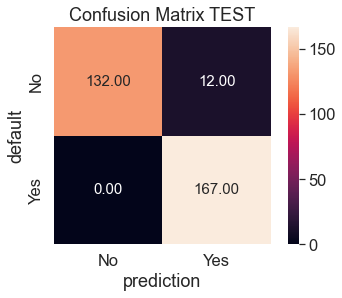

Precision:  0.9329608938547486
Recall:  1.0
Specificity:  0.9166666666666666


In [47]:
cm = confusion_matrix(Y_test, test_predictions.T)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

diagonal = np.diag(cm)
antidiagonal = np.fliplr(cm).diagonal()

false_positive = antidiagonal[0]
false_negative = antidiagonal[1]
true_positive = diagonal[1]
true_negative = diagonal[0]

# Precision 
pre = true_positive/(true_positive+false_positive)
# Recall
rec = true_positive/(true_positive+false_negative)
# Specificity
spe = true_negative/(true_negative+false_positive) 

print("Precision: ", pre)
print("Recall: ", rec)
print("Specificity: ", spe)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.3 Curva precision e recall </h4>
</div>

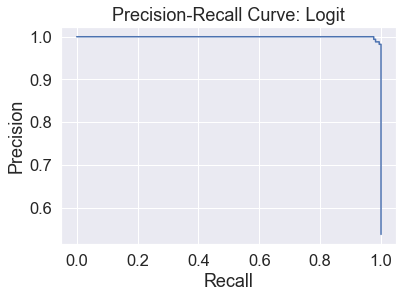

f1-score:  0.9653179190751445


In [55]:
precision, recall, thresholds = precision_recall_curve(Y_test, test_prob_predictions.T)

plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("f1-score: ", f1_score(Y_test, test_predictions.T))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Curva ROC e AUC </h4>
</div>

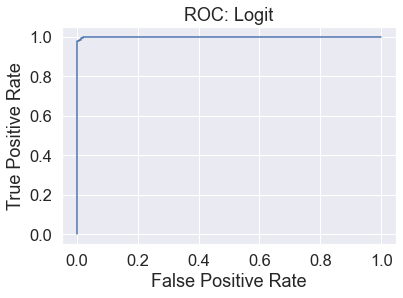

AUC:  0.9583333333333333


In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, test_prob_predictions.T)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, test_predictions.T))

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>